# 1. Numpy Basics 

## 1.1 Creating ndarrays

(a) list to array

In [31]:
import numpy as np

data1 = [1,2,3,4,9.8]
arr1 = np.array(data1)
data2 = [[1,2,3,4,5],[6,7,8]]
arr2 = np.array(data2)

##shape and dim
#print(arr2.ndim)
#print(arr2.shape)

#zero matrix, exmpty matrix and diag matrix
zo = np.zeros((3,4))
zm = np.empty((2,3,4))
ones = np.ones((4,4))
dig = np.diag((1,1,1,1,1))

#Seqence
seq = np.arange(2,10,step = 2)

#reverse
#seq[::-1]

(b) Data type 

int8, uint8 
int16, uint16
int32, uint32 
int64, uint64 
float16 
float32 
float64, float128

In [39]:
arr = np.array([1, 2, 3, 4, 5],dtype= 'int16')
arr.dtype == 'int16'
#arr.astype('float16')
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric = numeric_strings.astype('float32')

## 1.2 Operations between Arrays and Scalars

(a) + - * / 

In [41]:
## + - * / 
#arr*arr
#arr - arr
#1/arr
#arr*.6

(b) Basic Indexing and Slicing

*An important first distinction from lists is that array slices are views on the original array. This means that the data is not copied, and any modifications to the view will be reflected in the source array*

In [48]:
#arr[3:5]
#arr2[0][2]

(c) Boolean Indexing

In [65]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7,4)

#names == 'Bob'
#data[names == 'Bob']
#data[names == 'Bob', 2:]

In [63]:
mask = (names == 'Bob') | (names == 'Will')
#data[mask]

(d) Fancy Indexing

In [73]:
arr = np.random.randn(8, 5)
#arr[[4, 3, 0, 6]]

#np.ix_ function
arr[np.ix_([1,3],[2,4])]

array([[-0.80440853,  0.30722987],
       [-0.67317546,  1.87779339]])

(e) Transposing Arrays and Swapping Axes

In [74]:
arr = np.arange(15).reshape((3, 5))
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [75]:
arr = np.arange(16).reshape((2, 2, 4))
##??
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [78]:
#arr.swapaxes(1,2)

## 1.3 Universal Functions: Fast Element-wise Array Functions

|abs|sqrt|square|exp|log|sign|ceil|floor|rint|

|cos|sin|cosh|sinh|
|isnan|isfinite|isinf|


## 1.4 Data Processing Using Arrays


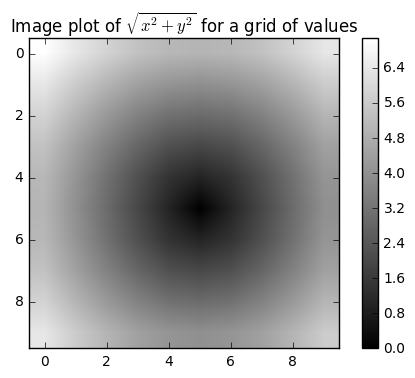

In [20]:
points = np.arange(-5,5,1)

#The np.meshgrid function takes two 1D arrays and produces two \
#2D matrices corresponding to all pairs of (x, y) in the two arrays:
xs, ys = np.meshgrid(points,points)

import matplotlib.pyplot as plt 
z = np.sqrt(xs**2+ys**2)
plt.imshow(z,cmap = plt.cm.gray)
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
plt.show()

### (a) Expressing Conditional Logic as Array Operations

|sum|mean|
|---|---|
|std|var|
|min|max|
|argmin|argmax|
|cumsum|cumprod|

For **boolean array**:
***************
|all|any|
*************

The **numpy.where** function is a vectorized version of the ternary expression x if condi
tion else y. 

In [38]:
xarr = np.arange(5)
yarr = np.arange(5,10)
cond = np.array([True, False, True, True, False])

result = [(x if c else y) for (x,y,c) in zip(xarr,yarr,cond)]

##np.where
result = np.where(cond, xarr, yarr)

##more examples
arr = np.random.randn(4,4)
#np.where(arr> 0, arr, 0)

### (b) Mathematical and Statistical Methods

In [39]:
arr = np.random.randn(5, 4) # normally-distributed data

#arr.mean()
#np.mean(arr)

#arr.sum()

take an optional **axis** argument which computes the statistic over the given axis

In [42]:
#arr.mean(axis=1)
#arr.cumsum(0)
#arr.cumprod(1)

### (c) Sort

In [63]:
np.random.seed(1)
arr = np.random.randn(5,3)
arr.sort(1)
#print(np.sort(arr,axis=None)) #flatten

#quantile
large_arr = np.random.randn(1000)
large_arr.sort()
q_25 = large_arr[int(.25*len(large_arr))]

### (d) Unique and Other Set Logic


|Method|Description|
|---|---|
|unique(x)|---|
|intersect1d(x,y)|$\cap$|
|union1d(x,y)|$\cup$|
|setdiff1d(x,y)|Set difference, elements in x that are not in y|

In [76]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

#sorted(set(names))

#np.in1d tests the membership 
values = np.array([6, 0, 0, 3, 2, 5, 6])
#np.in1d(values,[2,3,6])

array([ True, False, False,  True,  True, False,  True], dtype=bool)

### (e) Storing Arrays on Disk in Binary Format

In [79]:
np.save("some_array.npy",arr)
arr = np.load("some_array.npy")

## 1.5 Saving and Loading Text Files

In [81]:
#arr = np.loadtxt('array_ex.txt', delimiter=',',skiprows = 1)

## 1.6 Linear Algebra

diag,dot,trace,det,eig,inv,pinv,qr,svd,solve,lstsq

In [95]:
from numpy.linalg import *
X = np.random.randn(5, 5)

#inv(X)
#U,D,V = svd(X)
#solve(a = X, b = np.arange(5)) ## AX = B

## 1.7 Random Numbers

from numpy.random import *

|Method|Description|
|---|---|
|seed||
|permutation|Return a random permutation of a sequence, or return a permuted range|
|shuffle||
|rand|uniform distributino|
|randint(0,10)|Draw random integers from a given low-to-high range|
|randn|standard normal distribution|
|binominal||
|normal||
|beta||
|chisquare||
|gamma||
|uniform||    


--------------------

------------------------------

# 2. Pandas

## 2.1 Introduction to pandas Data Structures

### (a) Series

A Series is a one-dimensional array-like object containing an array of data, and an associated array of data labels, called its **index**

In [2]:
from pandas import *

obj = Series([4, 7, -5, 3])
#obj.values
#obj.index


#Dic to Series
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = Series(sdata)
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = Series(sdata, index=states)

##pd.isnull(obj4)   
##pd.notnull(obj4)

### (b) Dataframe

A DataFrame represents a tabular, spreadsheet-like data structure containing an ordered collection of columns, each of which can be a different value type (numeric,
string, boolean, etc.). The DataFrame has both a row and column index; it can be
thought of as a dict of Series (one for all sharing the same index).

In [3]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
'year': [2000, 2001, 2002, 2001, 2002],
'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}

frame = DataFrame(data)
#DataFrame(data, columns=['year', 'state', 'pop'])

frame2 = DataFrame(data, columns=['year', 'state', 'pop', 'debt'],\
index=['one', 'two', 'three', 'four', 'five'])

#frame.columns
#frame.index

Methods for index:

|Method |Description|
|---|---|
|append |Concatenate with additional Index objects, producing a new Index|
|diff |Compute set difference as an Index|
|intersection Compute set intersection|
|union |Compute set union|
|isin |Compute boolean array indicating whether each value is contained in the passed collection|
|delete |Compute new Index with element at index i deleted|
|drop |Compute new index by deleting passed values|
|insert |Compute new Index by inserting element at index i|
|is_monotonic |Returns True if each element is greater than or equal to the previous element|
|is_unique |Returns True if the Index has no duplicate values|
|unique |Compute the array of unique values in the Index|

## 2.2 Essential Functionality

### (a) Reindexing

In [7]:
obj = Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])

obj3 = Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
#obj3.reindex(range(6), method='ffill')
#obj3.reindex(range(6),method = 'bfill')

0      blue
1    purple
2    purple
3    yellow
4    yellow
5       NaN
dtype: object

### (b) Dropping entries from an axis

In [12]:
obj = Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])

new_obj = obj.drop('c')
#obj.drop(['d', 'c'])

In [21]:
data = DataFrame(np.arange(16).reshape((4, 4)),index=['Ohio', 'Colorado', 'Utah', 'New York'],\
columns=['one', 'two', 'three', 'four'])

data.drop(['two','four'],axis = 1) # axis is required for dropping columns
data.drop(['Colorado', 'Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


### (c) Indexing, selection, and filtering

In [26]:
data[data['three'] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


For DataFrame label-indexing on the rows, I introduce the special indexing field ix. It
enables you to select a subset of the rows and columns from a DataFrame with NumPylike notation plus axis labels.

**ix** :

|Type| Notes|
|---|---|
|obj[val]| Select single column or sequence of columns from the DataFrame.|
|obj.ix[val]| Selects single row of subset of rows from the DataFrame.|
|obj.ix[:, val]| Selects single column of subset of columns.|
|obj.ix[val1, val2]| Select both rows and columns.|
|reindex| method Conform one or more axes to new indexes.|
|xs| method Select single row or column as a Series by label.|
|icol, irow| methods Select single column or row, respectively, as a Series by integer location.|
|get_value, set_value| methods Select single value by row and column label.|

In [31]:
data.ix['Colorado', ['two', 'three']]
data.ix[['Colorado', 'Utah'], [3, 0, 1]]
data.ix[data.three > 5, :3]

,one,two,three
Colorado,4,5,6
Utah,8,9,10
New York,12,13,14


### (d) Arithmetic and data alignment

**Dataframe.add**:

|Method |Description|
|---|---|
|add |Method for addition (+)|
|sub |Method for subtraction (-)|
|div| Method for division (/)|
|mul| Method for multiplication (*)|

### (e) Function application and mapping

In [59]:
frame = DataFrame(np.random.randn(4, 3), columns=list('bde'), index=['Utah', 'Ohio', 'Texas', 'Oregon'])

f = lambda x: x.max()-x.min()

frame.apply(f)
frame.apply(f,axis = 1)

#custom function
def f(x):
    return Series([x.min(), x.max()], index=['min', 'max'])
    #return [x.min(),x.max()]

frame.apply(f)

,b,d,e
min,-0.427003,-1.641170,-0.969069
max,1.575337,1.138346,1.089724


In [62]:
# Decimals
format = lambda x: '%.2f' % x


# applymap: Element-wise
frame.applymap(format)

# frame['e'].map(format)

,b,d,e
Utah,-0.43,-0.74,-0.97
Ohio,-0.29,-1.64,1.09
Texas,0.40,1.14,-0.60
Oregon,1.58,0.45,0.97


### (f) Sorting and ranking

In [68]:
obj = Series(range(4), index=['d', 'a', 'b', 'c'],dtype='int16')

#To sort lexicographically by row or column index, use the sort_index method

obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int16

In [72]:
frame = DataFrame(np.arange(8).reshape((2, 4)), index=['three', 'one'], columns=['d', 'a', 'b', 'c'])

frame.sort_index(axis=1,ascending = 0)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


To sort a Series by its values, use its **order** method:

In [75]:
obj = Series([4, 7, -3, 2])

# obj.order()

On DataFrame, you may want to sort by the values in one or more columns. To do so,
pass one or more column names to the **by** option:

In [80]:
frame = DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame.sort_index(by='a')

#To sort by multiple columns, pass a list of names:
ff = frame.sort_index(by=['a', 'b'])

D:\AnacondaF\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app
D:\AnacondaF\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


In [84]:

#Ranking is closely related to sorting, assigning ranks from one through the number of
#valid data points in an array.

#the same as np.argsort
obj = Series([7, -5, 7, 4, 2, 0, 4])
obj.rank()
obj.rank(method='first',ascending=False)
#np.argsort(obj)

0    1.0
1    7.0
2    2.0
3    3.0
4    5.0
5    6.0
6    4.0
dtype: float64

## 2.3 Summarizing and Computing Descriptive Statistics

|Method| Description|
|---|---|
|count| Number of non-NA values|
|describe| Compute set of summary statistics for Series or each DataFrame column|
|min, max |Compute minimum and maximum values|
|argmin, argmax| Compute index locations (integers) at which minimum or maximum value obtained, respectively|
|idxmin, idxmax| Compute index values at which minimum or maximum value obtained, respectively|
|quantile |Compute sample quantile ranging from 0 to 1|
|sum |Sum of values|
|mean |Mean of values|
|median |Arithmetic median (50% quantile) of values|
|mad |Mean absolute deviation from mean value|
|var |Sample variance of values|
|std |Sample standard deviation of values|
|skew |Sample skewness (3rd moment) of values|
|kurt |Sample kurtosis (4th moment) of values|
|cumsum |Cumulative sum of values|
|cummin, cummax| Cumulative minimum or maximum of values, respectively|
|cumprod |Cumulative product of values|
|diff | Compute 1st arithmetic difference (useful for time series)|
|pct_change| Compute percent changes|

In [115]:
df = DataFrame([[1.4, np.nan], [7.1, -4.5],\
[np.nan, np.nan], [0.75, -1.3]],columns=['one', 'two'])

#df.mean(axis=1, skipna=False)
#df.sum(axis=1)
#df.sum()

# idxmin and idxmax: return the index
#df.idxmax()

# df.cumsum()
#df.describe()

#cov and cor
data = DataFrame(np.random.randn(5,5))
#data.cov()
#data.corr()

#np.cov(data)
#np.corrcoef(data)

###  Unique Values, Value Counts, and Membership

|Method| Description|
|---|---|
|isin| Compute boolean array indicating whether each Series value is contained in the passed sequence of values.|
|unique| Compute array of unique values in a Series, returned in the order observed.|
|value_counts| Return a Series contReturn a Series containing unique values as its index and frequencies as its values, ordered count indescending order.|

In [142]:
obj = Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'],dtype='str')

#Get the unique values
uniques = obj.unique()

#Value_counts
obj.value_counts()
value_counts(obj.values, sort=False)

#isin is responsible for vectorized set membership
mask = obj.isin(['b', 'c'])
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

In [148]:
#An example 
data = DataFrame({'Qu1': [1, 3, 4, 3, 4],'Qu2': [2, 3, 1, 2, 3],'Qu3': [1, 5, 2, 4, 4]})
result = data.apply(value_counts)
result.fillna(0)

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


## 2.4 Handling Missing Data

|Argument| Description|
|---|---|
|dropna |Filter axis labels based on whether values for each label have missing data, with varying thresholds for how much missing data to tolerate.|
|fillna |Fill in missing data with some value or using an interpolation method such as 'ffill' or 'bfill'.|
|isnull |Return like-type object containing boolean values indicating which values are missing / NA.|
|notnull| Negation of isnull.|

In [161]:
string_data = Series(['aardvark', 'artichoke', np.nan, 'avocado'])
string_data.isnull()

string_data[0] = None
#string_data.isnull()

string_data.dropna()
string_data[2] == None

False

In [163]:
data = DataFrame([[1., 6.5, 3.], [1., None, None],[None, None, None], [None, 6.5, 3.]])
cleaned = data.dropna()

#Drop only when all the elements are NaN
cleaned = data.dropna(how = 'all')

### Filling in Missing Data

In [172]:
df = DataFrame(np.random.randn(7, 3))
df.ix[:4, 1] = None; df.ix[:2, 2] = None

df.fillna(0)
df.fillna({1: 0.5, 3: -1})

# always returns a reference to the filled object
df.fillna(0, inplace=True)

#df.fillna(method='ffill')
# df.fillna(method='ffill', limit=2)

------------------------------

------------------------------

# 3. Data Loading, Storage, and File Formats

## 3.1 Reading and Writing Data in Text Format

|Function |Description|
|---|---|
|read_csv |Load delimited data from a file, URL, or file-like object. Use comma as default delimiter|
|read_table |Load delimited data from a file, URL, or file-like object. Use tab ('\t') as default delimiter|
|read_fwf | Read data in fixed-width column format (that is, no delimiters)|
|read_clipboard | Version ofread_table that reads data from the clipboard. Useful for converting tables from web pages|

Read Function Arguments:

Argument Description

|path| String indicating filesystem location, URL, or file-like object|
|---|---|
|sep| or delimiter Character sequence or regular expression to use to split fields in each row
|header| Row number to use as column names. Defaults to 0 (first row), but should be None if there is no header row
|index_col| Column numbers or names to use as the row index in the result. Can be a single name/number or a list of them for a hierarchical index
|names| List of column names for result, combine with header=None
|skiprows| Number of rows at beginning of file to ignore or list of row numbers (starting from 0) to skip
|na_values| Sequence of values to replace with NA
|comment| Character or characters to split comments off the end of lines
|parse_dates| Attempt to parse data to datetime; False by default. If True, will attempt to parse all columns. Otherwise can specify a list of column numbers or name to parse. If element of list is tuple or list, will combine multiple columns together and parse to date (for example if date/time split across two columns)
|keep_date_col| If joining columns to parse date, drop the joined columns. Default True converters Dict containing column number of name mapping to functions. For example{'foo': f} would apply the function f to all values in the 'foo' column 
|dayfirst| When parsing potentially ambiguous dates, treat as international format (e.g. 7/6/2012 -> June 7,2012). Default False 
|date_parser| Function to use to parse dates
|nrows| Number of rows to read from beginning of file
|iterator| Return a TextParser object for reading file piecemeal chunksize For iteration, size of file chunks
|skip_footer| Number of lines to ignore at end of file
|verbose| Print various parser output information, like the number of missing values placed in non-numeric columns
|encoding| Text encoding for unicode. For example 'utf-8' for UTF-8 encoded text
|squeeze| If the parsed data only contains one column return a Series
|thousands| Separator for thousands, e.g. ',' or '

## 3.2 Read csv from url

In [182]:
import pandas as pd
import io
import requests
url="https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))

#or
c = pd.read_csv("https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv")

## 3.3 Save

In [203]:
#c.to_csv("")

_________________________

__________________________---

# 4. Data Wrangling: Clean, Transform, Merge, Reshape

• pandas.merge connects rows in DataFrames based on one or more keys. This will
be familiar to users of SQL or other relational databases, as it implements database
join operations.
• pandas.concat glues or stacks together objects along an axis.
• combine_first instance method enables splicing together overlapping data to fill
in missing values in one object with values from another.

## 4.1 Merge

In [13]:
df1 = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],'data1': range(7)})
df2 = DataFrame({'key': ['a', 'b', 'd'],'data2': range(3)})

# Calling **merge** with these objects we obtain:
merge(df1,df2, on = 'key')

df3 = DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],'data1': range(7)})
df4 = DataFrame({'rkey': ['a', 'b', 'd'],'data2': range(3)})

merge(df3, df4, left_on='lkey', right_on='rkey')

#By default merge does an 'inner' join; the keys in the result are the intersection. \
#Other possible options are 'left', 'right', and 'outer'.

merge(df1, df2, how='outer')

,data1,key,data2
0,0.0,b,1.0
1,1.0,b,1.0
2,6.0,b,1.0
3,2.0,a,0.0
4,4.0,a,0.0
5,5.0,a,0.0
6,3.0,c,NaN
7,NaN,d,2.0


## 4.2 Concatenating Along an Axis

In [35]:
arr1 = np.arange(12).reshape((3, 4))
arr2 = np.arange(12,24).reshape(3,4)
 
#np.concatenate
np.concatenate([arr1,arr2],axis = 1)


array([[ 0,  1,  2,  3, 12, 13, 14, 15],
       [ 4,  5,  6,  7, 16, 17, 18, 19],
       [ 8,  9, 10, 11, 20, 21, 22, 23]])

In [23]:
s1 = Series([0, 1], index=['a', 'b'])
s2 = Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = Series([5, 6], index=['f', 'g'])

#pd.concat([s1,s2,s3])

df1 = DataFrame(arr1)
df2 = DataFrame(arr2)

concat([df1,df2])

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
0,12,13,14,15
1,16,17,18,19
2,20,21,22,23


### pandas.DataFrame.drop
### pandas.DataFrame.transpose

In [37]:
#DataFrame.drop(labels, axis=0, level=None, inplace=False, errors='raise')
df1.drop(0,axis = 1)

#pandas.DataFrame.transpose
df1.transpose()

,0,1,2
0,0,4,8
1,1,5,9
2,2,6,10
3,3,7,11


### Removing duplicate

In [42]:
data = DataFrame({'k1': ['one'] * 3 + ['two'] * 4, 'k2': [1, 1, 2, 3, 3, 4, 4]})
data.duplicated()
data.drop_duplicates()


#Suppose we had an additional column of values and wanted to filter duplicates only based on the 'k1' column:
data['v1'] = range(7)
data.drop_duplicates(['k1'])
data.drop_duplicates(['k1', 'k2'], take_last=True)

D:\AnacondaF\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: the take_last=True keyword is deprecated, use keep='last' instead


,k1,k2,v1
1,one,1,1
2,one,2,2
4,two,3,4
6,two,4,6


### Transforming Data Using a Function or Mapping

In [60]:
data = DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami','corned beef', \
                           'Bacon', 'pastrami', 'honey ham','nova lox'],\
                  'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})

meat_to_animal = {
'bacon': 'pig',
'pulled pork': 'pig',
'pastrami': 'cow',
'corned beef': 'cow',
'honey ham': 'pig',
'nova lox': 'salmon'
}

data['animal'] = data['food'].map(str.lower).map(meat_to_animal)

#data['food'].map(lambda x: meat_to_animal[x.lower()])

### Replacing Values

In [64]:
data = Series([1., -999., 2., -999., -1000., 3.])

tona = {-999:np.nan,-100:np.nan}

#data.map(tona) Wrong!
data.replace([-999, -1000], np.nan)
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

-------------------------

--------------------------------

# 5. Data Aggregation and Group Operations

In [47]:
df = DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],'key2' : ['one', 'two', 'one', 'two', 'one'],\
'data1' : np.random.randn(5),'data2' : np.random.randn(5)})

df['year'] = [2016 if x == 'one' else 2017 for x in df['key2']]

grouped = df['data1'].groupby(df['key1'])

grouped.mean()

#type(grouped.mean())
#pandas.core.series.Series

means = df['data1'].groupby([df['key1'], df['key2']]).mean()

df.groupby('key1')['data1'].mean()

key1
a    0.511520
b    0.432462
Name: data1, dtype: float64

### Grouping with Dicts and Series

In [62]:
people = DataFrame(np.random.randn(5, 5),columns=['a', 'b', 'c', 'd', 'e'],\
                   index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])

people.ix[2:3, ['b', 'c']] = np.nan # Add a few NA value

# Custom grouping 
mapping = {'a': 'red', 'b': 'red', 'c': 'blue','d': 'blue', 'e': 'red', 'f' : 'orange'}
by_column = people.groupby(mapping, axis=1)
by_column.sum()

# Counts!!!!
people.groupby(mapping, axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


### Grouping with Functions

In [67]:
#Suppose you wanted to group by the length of the names;
people.groupby(len).sum()

key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).min()

a         b         c         d         e
3 one -0.787208 -0.256314  1.802367 -0.660231  0.515696
  two -1.400835 -0.108482  1.132723  1.449876  0.527170
5 one  1.757622 -0.540316  0.531573 -0.369275 -0.361599
6 two  1.941148  0.786717 -0.324028  0.677945 -0.313325

### Grouping by Index Levels

In [73]:
columns = MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],[1, 3, 5, 1, 3]], names=['cty', 'tenor'])

hier_df = DataFrame(np.random.randn(4, 5), columns=columns)

hier_df.groupby(level='cty', axis=1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


### Permutation and Random Sampling

In [78]:
df = DataFrame(np.arange(5 * 4).reshape(5, 4))

# Random permutation

sampler = np.random.permutation(5)

# That array can then be used in ix-based indexing or the take function:

df.take(sampler)

df.take(np.random.permutation(len(df))[:3])

,0,1,2,3
0,0,1,2,3
3,12,13,14,15
1,4,5,6,7


_______________________________-

_______________________

# Other Topics 

## Python Counter

In [38]:
from collections import Counter

#Creat counter for countring numbers

c = Counter() # Empty
c = Counter('galland') # create from an iterable object
c = Counter({'a':4,'b':2})
c = Counter(a = 4, b = 2)

#update

c = Counter('which')
c.update('witch')

#c['h']

c.subtract('twich')
#c.subtract('hello') some elements have negative values


## List elements
list(c.elements())

## Most common
c.most_common(3)

## Counter to list or to dic
#list(c)
#dict(c)

# Other operations
d = Counter('absolutely')
# c-d
# c | d
# c & d

## Read Files in a row

In [40]:
import os

INPUT_FOLDER = 'C:/Users/heitangtang/Documents/names'

#
names = os.listdir(INPUT_FOLDER)

-----------------------

-----------------------

# Examples

# a. Spam Data 

In [28]:
# Readin data
from collections import Counter

f = open('SMSspam.txt','r')
c = Counter()

i = 0
for line in f.readlines():
    i += 1
    
    c.update(line.split(' '))
    #print(line.split(' '))

print(c.most_common(10))

# Pandas Approach doesn't work because the data is unstructed
#from pandas import *
#import numpy as np
#data = np.loadtxt('SMSspam.txt',delimiter = ' ',dtype = 'str')


[('to', 2142), ('you', 1598), ('a', 1337), ('the', 1206), ('I', 1074), ('and', 858), ('in', 795), ('u', 793), ('is', 781), ('i', 737)]


In [37]:
#sort 
dc = dict(c)
sort_dc = sorted(dc.items(), key=lambda x: x[1],reverse = 1)

## b. Baby names

In [74]:
import os
INPUT_FOLDER = 'C:/Users/heitangtang/Documents/names'
paths = os.listdir(INPUT_FOLDER) 

Datadic = dict()


## Readin Data
from pandas import *

for s in paths[1:]:
    #print('current: ',s)
    data = read_csv(INPUT_FOLDER + '/' + s, sep = ',', header = None,names=['name', 'sex', 'births'])
    year = int(s[3:-4])
    Datadic[year] = data
    
data = read_csv(INPUT_FOLDER + '/' + 'yob1882.txt', sep = ',', header = None)

##Groupy
names1880 = Datadic[1880]
names1880.groupby('sex').sum()['births']

sex
F     90993
M    110493
Name: births, dtype: int64

In [61]:
Datadic[1880]

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288
